In [202]:
import seaborn as sns 
import matplotlib.pyplot as plt
import pandas as pd
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
import numpy as np

In [203]:
#pip install openpyxl


In [204]:
df = pd.read_csv('FCV&EVMT Data_6.18.19.csv')

In [205]:
df.head(5)

id. Response ID submitdate. Date submitted  \
0         FCV_1_3             6/2/2017 11:30   
1         FCV_1_4             6/2/2017 11:15   
2         FCV_1_2             6/2/2017 10:51   
3         FCV_1_5                        NaN   
4        FCV_1_15             6/2/2017 19:35   

  Month Year[subm...Date submitted]  Month[Month Yea...ate submitted]]  \
0                            Jun-17                                6.0   
1                            Jun-17                                6.0   
2                            Jun-17                                6.0   
3                               NaN                                NaN   
4                            Jun-17                                6.0   

   Year[Month Year...ate submitted]]  lastpage. Last page            Carmain  \
0                             2017.0                 42.0  2016 Toyota Mirai   
1                             2017.0                 42.0  2016 Toyota Mirai   
2                             2017.0                 42.0  2016 Toyota Mirai   
3                                NaN                  NaN                NaN   
4                             2017.0                 42.0  2017 Toyota Mirai   

   Previous PHEVs  Previous BEVs  Previous HEVs  ...  \
0             1.0            0.0            0.0  ...   
1             0.0            0.0            1.0  ...   
2             1.0            1.0            0.0  ...   
3             NaN            NaN            NaN  ...   
4             1.0            0.0            0.0  ...   

   Highest Level of Education  Longest trip in the last 12 months  \
0                         3.0                              483.14   
1                         4.0                              568.09   
2                         4.0                              398.57   
3                         NaN                                 NaN   
4                         2.0                              255.16   

   Number of trips over 200 miles in the last 12 months  \
0                                                0.0      
1                                                1.0      
2                                                0.0      
3                                                NaN      
4                                                0.0      

   One-way commute distance  Number of people in the household   Age  \
0                      0.01                                2.0  65.0   
1                     10.69                                3.0  65.0   
2                      9.39                                5.0  55.0   
3                       NaN                                NaN   NaN   
4                     17.63                                2.0  55.0   

   Gender (Male 1)  Number of vehicles in the household  Annual VMT Estimate   \
0              0.0                                    2          14622.000000   
1              0.0                                    3           9197.142857   
2              1.0                                    4          15360.000000   
3              NaN                                    1                   NaN   
4              0.0                                    3           5082.352941   

   FCV, BEV Dummy  
0             0.0  
1             0.0  
2             0.0  
3             NaN  
4             0.0  

[5 rows x 25 columns]

In [206]:
df=df.dropna(subset=['FCV, BEV Dummy']) #dropping the columns which are having the null values in the target variable FCV, BEV Dummy

In [207]:
df.describe()       #gives statistical description of the dataset

Month[Month Yea...ate submitted]]  Year[Month Year...ate submitted]]  \
count                       11140.000000                       11140.000000   
mean                            7.380251                        2016.644973   
std                             2.229358                           1.152088   
min                             4.000000                        2015.000000   
25%                             6.000000                        2016.000000   
50%                             8.000000                        2017.000000   
75%                             9.000000                        2018.000000   
max                            12.000000                        2018.000000   

       lastpage. Last page  Previous PHEVs  Previous BEVs  Previous HEVs  \
count         14030.000000     8331.000000    8331.000000    8331.000000   
mean             38.173343        0.094586       0.180290       0.213780   
std              12.520629        0.292660       0.384452       0.409998   
min              -1.000000        0.000000       0.000000       0.000000   
25%              42.000000        0.000000       0.000000       0.000000   
50%              43.000000        0.000000       0.000000       0.000000   
75%              45.000000        0.000000       0.000000       0.000000   
max              49.000000        1.000000       1.000000       1.000000   

       Previous CNGs  Household Income  \
count    8331.000000       9386.000000   
mean        0.005041     205569.465161   
std         0.070828     115571.467560   
min         0.000000      50000.000000   
25%         0.000000     125000.000000   
50%         0.000000     175000.000000   
75%         0.000000     275000.000000   
max         1.000000     500000.000000   

       Importance of reducing greenhouse gas emissions (-3 not important, 3 important)  \
count                                       10255.000000                                 
mean                                            1.804002                                 
std                                             1.583953                                 
min                                            -3.000000                                 
25%                                             1.370000                                 
50%                                             2.600000                                 
75%                                             2.780000                                 
max                                             3.000000                                 

       Home ownership (own 1)  ...  Highest Level of Education  \
count            10518.000000  ...                10543.000000   
mean                 0.863852  ...                    3.385184   
std                  0.342961  ...                    0.680289   
min                  0.000000  ...                    1.000000   
25%                  1.000000  ...                    3.000000   
50%                  1.000000  ...                    3.000000   
75%                  1.000000  ...                    4.000000   
max                  1.000000  ...                    4.000000   

       Longest trip in the last 12 months  \
count                         6725.000000   
mean                           367.051637   
std                            344.281744   
min                              0.210000   
25%                            162.570000   
50%                            311.720000   
75%                            431.570000   
max                           4419.330000   

       Number of trips over 200 miles in the last 12 months  \
count                                       8.077000e+03      
mean                                        2.753080e+04      
std                                         2.472660e+06      
min                                         0.000000e+00      
25%                                         0.000000e+00      
50%                                      

In [208]:
df.shape    #gives the rows and columns of the dataset

(14044, 25)

In [209]:
dfn=df[['Previous BEVs','Household Income','Importance of reducing greenhouse gas emissions (-3 not important, 3 important)',
        'Home Type (detached 1)','One-way commute distance',
        'Number of people in the household','Age',
        'Number of vehicles in the household','FCV, BEV Dummy']]

In [210]:
#changing column names
column_names= {'Previous BEVs':'Previous BEVs',
    'Importance of reducing greenhouse gas emissions (-3 not important, 3 important)':'CO2 emission',
                       'Home Type (detached 1)':'Home Type',
                       'One-way commute distance': 'Commute distance',
                       'Number of people in the household': 'Household size',
                       'Age':'Age',
                       'Number of vehicles in the household':'# vehicles'}

dfn = dfn.rename(columns=column_names)

In [211]:
dfn.head()

Previous BEVs  Household Income  CO2 emission  Home Type  Commute distance  \
0            0.0          275000.0          2.52        1.0              0.01   
1            0.0          275000.0          2.76        1.0             10.69   
2            1.0               NaN           NaN        1.0              9.39   
4            0.0          125000.0          2.60        1.0             17.63   
5            0.0          175000.0          1.23        1.0              3.53   

   Household size   Age  # vehicles  FCV, BEV Dummy  
0             2.0  65.0           2             0.0  
1             3.0  65.0           3             0.0  
2             5.0  55.0           4             0.0  
4             2.0  55.0           3             0.0  
5             2.0  75.0           2             0.0

In [212]:
dfn.tail()

Previous BEVs  Household Income  CO2 emission  Home Type  \
27013            NaN          125000.0          2.93        1.0   
27015            NaN               NaN           NaN        NaN   
27016            NaN          125000.0          0.01        1.0   
27017            NaN           75000.0          1.09        1.0   
27020            NaN               NaN          2.63        1.0   

       Commute distance  Household size   Age  # vehicles  FCV, BEV Dummy  
27013             29.27             3.0  65.0           2             1.0  
27015               NaN             5.0  55.0           5             1.0  
27016             47.17             1.0  55.0           3             1.0  
27017              5.69             2.0  25.0           3             1.0  
27020             30.04             2.0  55.0           3             1.0

In [213]:
dfn.isnull().sum()

Previous BEVs       5713
Household Income    4658
CO2 emission        3789
Home Type           3503
Commute distance    3242
Household size      1945
Age                 2080
# vehicles             0
FCV, BEV Dummy         0
dtype: int64

In [214]:
#cleaning null values
columns_to_fill_mean = ['Household Income','CO2 emission', 'Home Type', 'Commute distance', 'Household size', 'Age']

dfn['Previous BEVs'] = dfn['Previous BEVs'].fillna(0)   #we are assuming that the previous BEVs are 0 if the column is having null values
for column in columns_to_fill_mean:
    mean_value = dfn[column].mean()
    dfn[column] = dfn[column].fillna(mean_value)    #filling the null values with the mean value

In [215]:
dfn.describe()

Previous BEVs  Household Income  CO2 emission     Home Type  \
count    14044.00000      14044.000000  14044.000000  14044.000000   
mean         0.10695     205569.465161      1.804002      0.827056   
std          0.30906      94479.550559      1.353502      0.327666   
min          0.00000      50000.000000     -3.000000      0.000000   
25%          0.00000     125000.000000      1.804002      0.827056   
50%          0.00000     205569.465161      1.885000      1.000000   
75%          0.00000     225000.000000      2.730000      1.000000   
max          1.00000     500000.000000      3.000000      1.000000   

       Commute distance  Household size           Age   # vehicles  \
count      14044.000000    14044.000000  14044.000000  14044.00000   
mean          19.043925        2.918919     49.942494      2.31558   
std           41.812095        1.156286     12.212853      0.99179   
min            0.000000        1.000000     18.000000      1.00000   
25%            8.440000        2.000000     45.000000      2.00000   
50%           19.041963        2.918919     49.942494      2.00000   
75%           20.002500        4.000000     55.000000      3.00000   
max         2381.910000       12.000000     80.000000      5.00000   

       FCV, BEV Dummy  
count    14044.000000  
mean         0.934420  
std          0.247555  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000

In [216]:
dfn.shape

(14044, 9)

In [217]:
from imblearn.over_sampling import ADASYN
from sklearn.model_selection import train_test_split
import pandas as pd


X = dfn.drop('FCV, BEV Dummy', axis=1)  
y = dfn['FCV, BEV Dummy']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


num_class_0 = y_train.value_counts()[0]
total_samples_needed = 20000


if num_class_0 < total_samples_needed:

    samples_to_generate = total_samples_needed - num_class_0            #20000-921 
    sampling_strategy = {0: samples_to_generate}
else:
    
    sampling_strategy = {0: num_class_0}


adasyn = ADASYN(sampling_strategy=sampling_strategy, random_state=42)


X_resampled, y_resampled = adasyn.fit_resample(X_train, y_train)


resampled_data = pd.DataFrame(X_resampled, columns=X.columns)
resampled_data['FCV, BEV Dummy'] = y_resampled
dfn = resampled_data


majority_df = dfn[dfn['FCV, BEV Dummy'] == 1]
minority_df = dfn[dfn['FCV, BEV Dummy'] == 0]  
print("Class 1 count:", majority_df.shape[0])
print("Class 0 count:", minority_df.shape[0])
print("Total count after resampling:", dfn.shape[0])


Class 1 count: 10507
Class 0 count: 19358
Total count after resampling: 29865


In [218]:
#Removing Outliers
def remove_outliers(data, columns_to_analyze, threshold=1.5):
    result_df = data.copy()

    for column in columns_to_analyze:
        
        Q1 = result_df[column].quantile(0.25)
        Q3 = result_df[column].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR
        outliers_mask = (result_df[column] >= lower_bound) & (result_df[column] <= upper_bound)
        result_df = result_df[outliers_mask]
        print(result_df.shape)
    return result_df


In [219]:
dfn.head()

Previous BEVs  Household Income  CO2 emission  Home Type  Commute distance  \
0            0.0     225000.000000      2.770000   1.000000              1.13   
1            0.0     225000.000000      2.370000   1.000000             26.46   
2            0.0     175000.000000      2.770000   1.000000              0.63   
3            0.0     205569.465161      1.804002   0.827056             59.93   
4            0.0     225000.000000     -3.000000   1.000000             18.95   

   Household size   Age  # vehicles  FCV, BEV Dummy  
0             5.0  55.0           2             1.0  
1             3.0  45.0           2             1.0  
2             2.0  65.0           2             1.0  
3             5.0  35.0           3             1.0  
4             4.0  45.0           2             1.0

In [220]:
dfn.describe()

Previous BEVs  Household Income  CO2 emission     Home Type  \
count   29865.000000      29865.000000  29865.000000  29865.000000   
mean        0.078362     203566.316554      1.929898      0.788634   
std         0.244695      94716.333708      1.116069      0.322896   
min         0.000000      50000.000000     -3.000000      0.000000   
25%         0.000000     125000.000000      1.804002      0.827056   
50%         0.000000     205569.465161      2.034807      0.954068   
75%         0.000000     225000.000000      2.716092      1.000000   
max         1.000000     500000.000000      3.000000      1.000000   

       Commute distance  Household size           Age    # vehicles  \
count      29865.000000    29865.000000  29865.000000  29865.000000   
mean          18.614121        2.906681     50.602103      2.133333   
std           28.349757        1.057555     11.406680      0.933122   
min            0.000000        1.000000     18.000000      1.000000   
25%            9.080170        2.000000     45.000000      1.000000   
50%           19.043925        2.918919     49.942494      2.000000   
75%           20.580675        3.734854     55.000000      3.000000   
max         2381.910000       12.000000     80.000000      5.000000   

       FCV, BEV Dummy  
count    29865.000000  
mean         0.351817  
std          0.477545  
min          0.000000  
25%          0.000000  
50%          0.000000  
75%          1.000000  
max          1.000000

In [221]:
dfn1=dfn[dfn['Household Income'] <= 150000] #low level income
dfn2 = dfn[(dfn['Household Income'] > 150000) & (dfn['Household Income'] <= 250000)]    #medium level income
dfn3=dfn[dfn['Household Income']>250000]    #high level income



In [222]:
dfn1=remove_outliers(dfn1,['Commute distance','Household size','Age'])
dfn2=remove_outliers(dfn2,['Commute distance','Household size','Age'])
dfn3=remove_outliers(dfn3,['Commute distance','Household size','Age'])

(7499, 9)
(7376, 9)
(7376, 9)
(14784, 9)
(14270, 9)
(13284, 9)
(5003, 9)
(4998, 9)
(4913, 9)


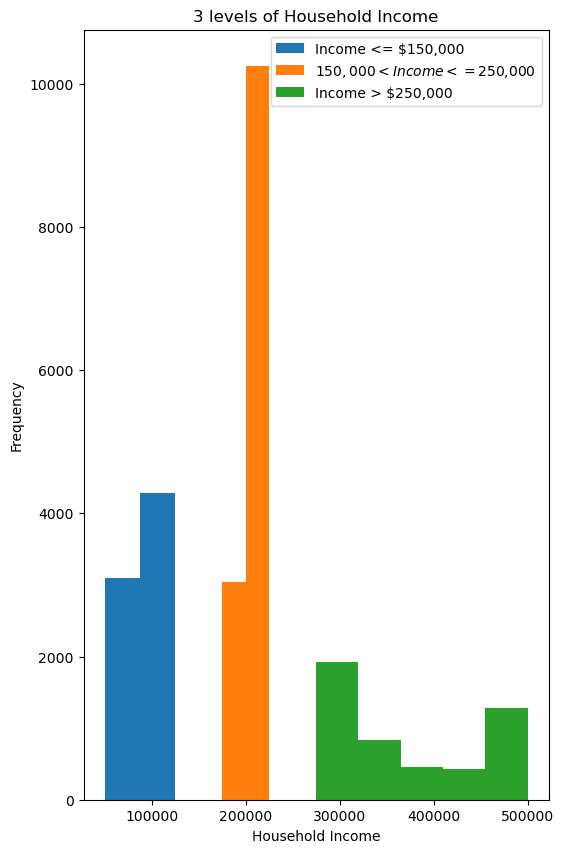

In [223]:
#Plotting histogram
plt.figure(figsize=(6, 10))
plt.hist(dfn1['Household Income'], bins=2, alpha=1, label='Income <= $150,000')
plt.hist(dfn2['Household Income'], bins=2, alpha=1, label='$150,000 < Income <= $250,000')
plt.hist(dfn3['Household Income'], bins=5, alpha=1, label='Income > $250,000')
plt.title('3 levels of Household Income')
plt.xlabel('Household Income')
plt.ylabel('Frequency')
plt.legend()
plt.show()


In [224]:
#dropping Household Income column 
dfn1=dfn1.drop(['Household Income'],axis=1)
dfn2=dfn2.drop(['Household Income'],axis=1)
dfn3=dfn3.drop(['Household Income'],axis=1)

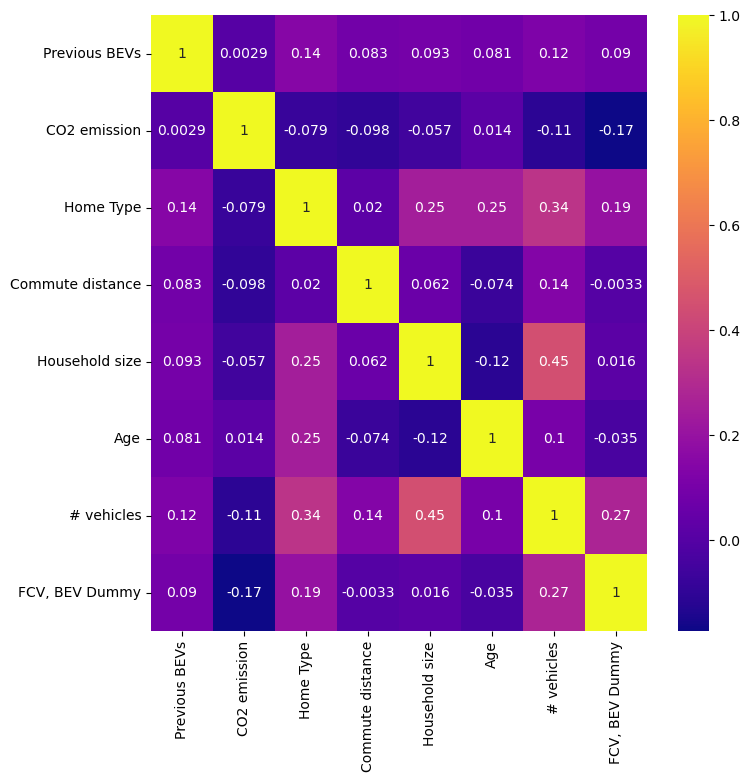

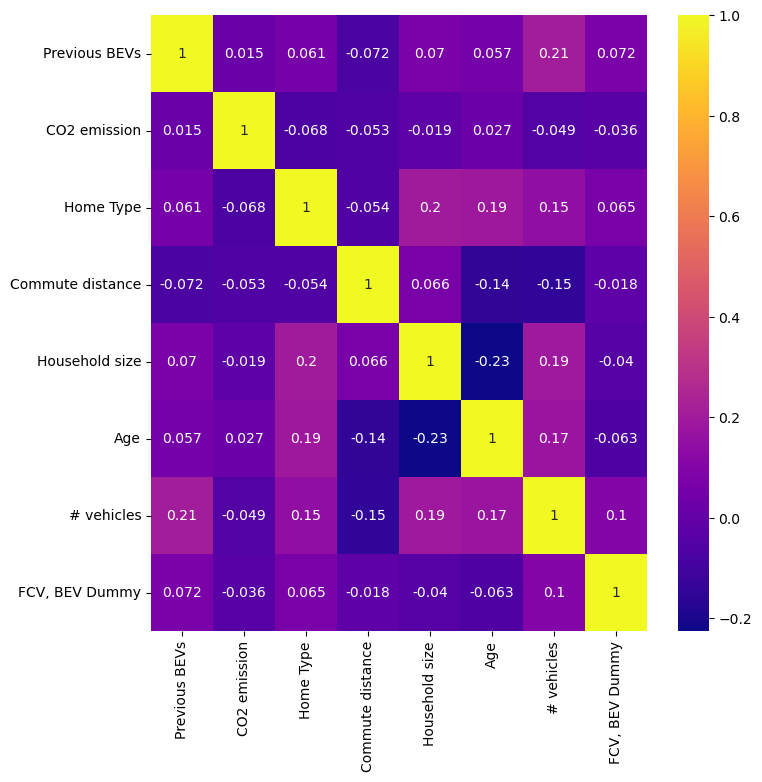

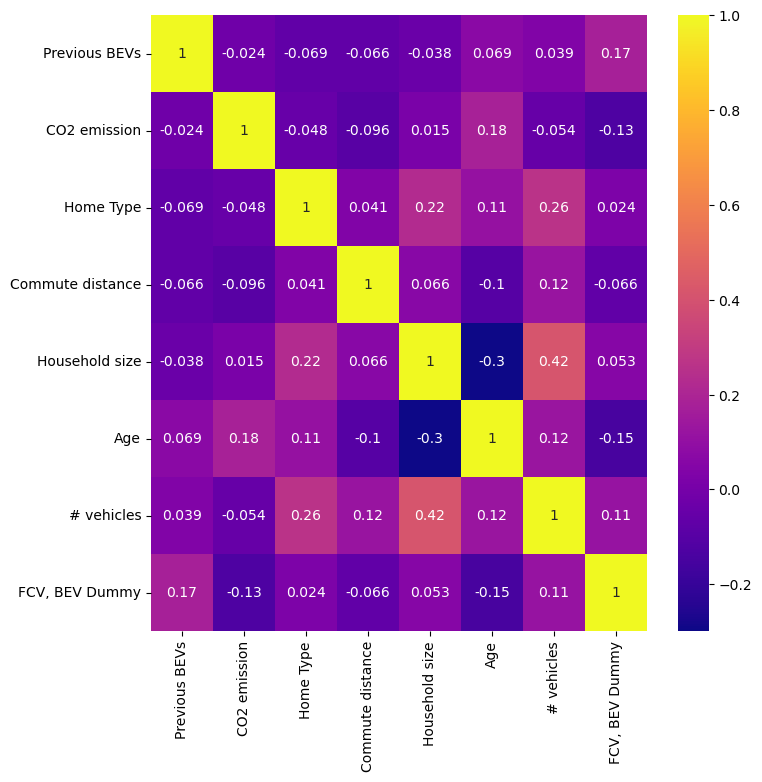

In [225]:
#Heat map of correaltion matrices
H1=dfn1.corr()
fig, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(H1,annot=True,cmap='plasma')
plt.show()

H2=dfn2.corr()
fig, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(H2, annot=True,cmap='plasma')
plt.show()

H3=dfn3.corr()
fig, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(H3, annot=True,cmap='plasma')
plt.show()

MODEL IMPLEMENTATION 

1.Naive Bayes

In [226]:
#using posterior probability to predict the output

1.1 Low Level Income

In [227]:
X=dfn1.drop('FCV, BEV Dummy',axis=1)        #independent variables
y=dfn1['FCV, BEV Dummy']                    #dependent variable

In [228]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.5,random_state=42)

In [229]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(X_train,y_train)

GaussianNB()

In [230]:
y_pred=model.predict(X_test)

In [231]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.72      0.89      0.79      2449
         1.0       0.59      0.30      0.39      1239

    accuracy                           0.69      3688
   macro avg       0.65      0.60      0.59      3688
weighted avg       0.67      0.69      0.66      3688



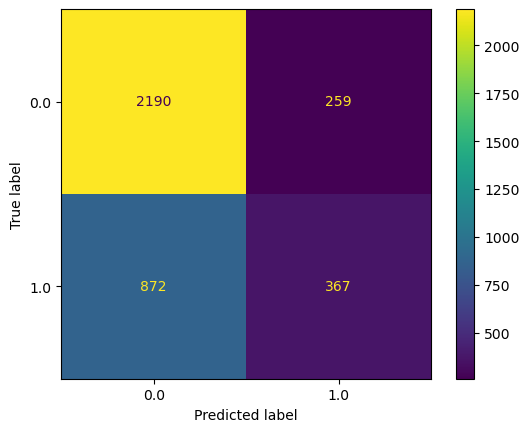

In [232]:
from sklearn.metrics import f1_score,classification_report,ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=model.classes_)
disp.plot()

plt.show()

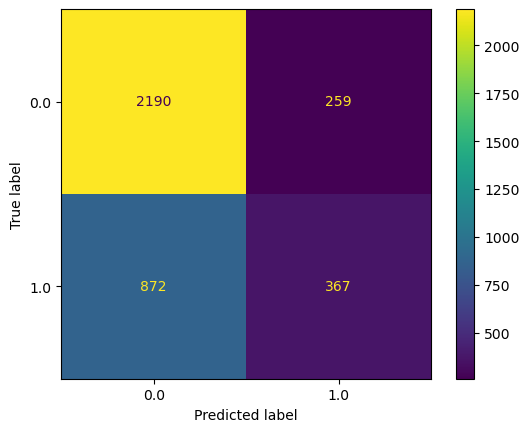

In [233]:
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=model.classes_)
disp.plot()

plt.show()

1.2 Medium Level Income

In [234]:
X=dfn2.drop('FCV, BEV Dummy',axis=1)
y=dfn2['FCV, BEV Dummy']

In [235]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.5,random_state=42)

In [236]:
model=GaussianNB()
model.fit(X_train,y_train)

GaussianNB()

In [237]:
y_pred=model.predict(X_test)

In [238]:
print(classification_report(y_test,y_pred,zero_division=1))

              precision    recall  f1-score   support

         0.0       0.67      0.90      0.77      4350
         1.0       0.46      0.17      0.25      2292

    accuracy                           0.65      6642
   macro avg       0.57      0.53      0.51      6642
weighted avg       0.60      0.65      0.59      6642



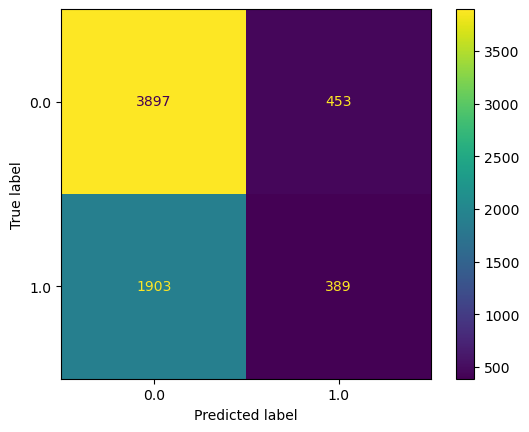

In [239]:

cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=model.classes_)
disp.plot()

plt.show()

1.3 High Level Income

In [240]:
X=dfn3.drop('FCV, BEV Dummy',axis=1)
y=dfn3['FCV, BEV Dummy']

In [241]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.5,random_state=42)

In [242]:
model=GaussianNB()
model.fit(X_train,y_train)

GaussianNB()

In [243]:
model.score(X_test,y_test)

0.6585266585266585

In [244]:
y_pred=model.predict(X_test)

In [245]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.67      0.89      0.77      1549
         1.0       0.59      0.26      0.36       908

    accuracy                           0.66      2457
   macro avg       0.63      0.58      0.56      2457
weighted avg       0.64      0.66      0.62      2457



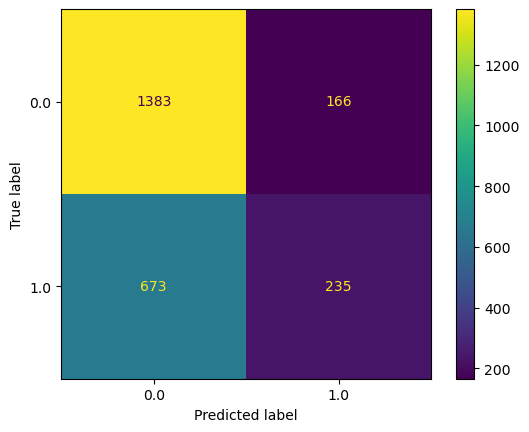

In [246]:
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=model.classes_)
disp.plot()

plt.show()

2.Logistic Regression

In [247]:
from sklearn.linear_model import LogisticRegression

2.1 Low Level Income

In [248]:
X=dfn1.drop('FCV, BEV Dummy',axis=1)
y=dfn1['FCV, BEV Dummy']

In [249]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.5,random_state=42)

In [250]:

model=LogisticRegression(solver='liblinear',random_state=42)

In [251]:
model.fit(X_train,y_train)

LogisticRegression(random_state=42, solver='liblinear')

In [252]:
y_pred=model.predict(X_test)

In [253]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.73      0.93      0.82      2449
         1.0       0.69      0.33      0.45      1239

    accuracy                           0.73      3688
   macro avg       0.71      0.63      0.63      3688
weighted avg       0.72      0.73      0.69      3688



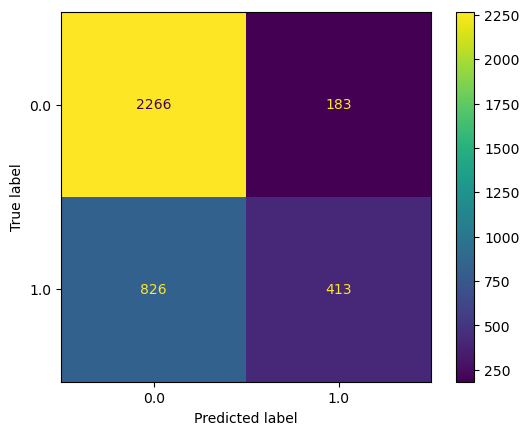

In [254]:
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=model.classes_)
disp.plot()

plt.show()

2.2 Medium Level Income

In [255]:
X=dfn2.drop('FCV, BEV Dummy',axis=1)
y=dfn2['FCV, BEV Dummy']

In [256]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.5,random_state=42)

In [257]:

model=LogisticRegression(solver='liblinear',random_state=42)

In [258]:
model.fit(X_train,y_train)

LogisticRegression(random_state=42, solver='liblinear')

In [259]:
y_pred=model.predict(X_test)

In [260]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.68      0.96      0.79      4350
         1.0       0.62      0.13      0.22      2292

    accuracy                           0.67      6642
   macro avg       0.65      0.54      0.51      6642
weighted avg       0.66      0.67      0.59      6642



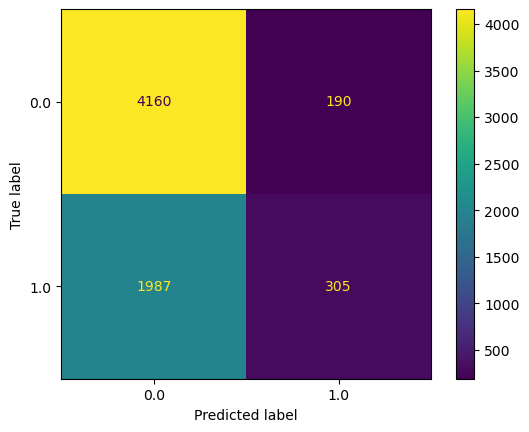

In [261]:
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=model.classes_)
disp.plot()

plt.show()

2.3 High Level Income

In [262]:
X=dfn3.drop('FCV, BEV Dummy',axis=1)
y=dfn3['FCV, BEV Dummy']

In [263]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.5,random_state=42)

In [264]:

model=LogisticRegression(solver='liblinear',random_state=42)

In [265]:
model.fit(X_train,y_train)

LogisticRegression(random_state=42, solver='liblinear')

In [266]:
y_pred=model.predict(X_test)

In [267]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.68      0.92      0.78      1549
         1.0       0.65      0.24      0.35       908

    accuracy                           0.67      2457
   macro avg       0.66      0.58      0.57      2457
weighted avg       0.67      0.67      0.62      2457



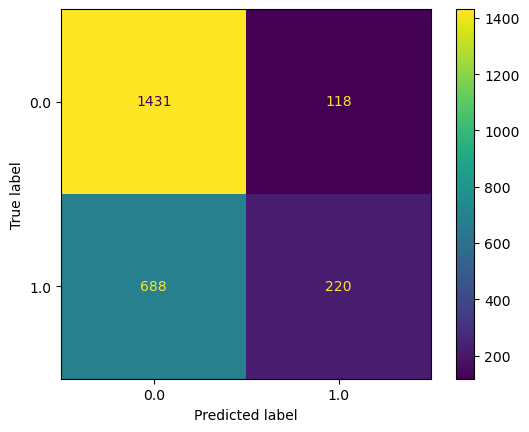

In [268]:
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=model.classes_)
disp.plot()

plt.show()

3.SVM

3.1 Low Level Income

In [269]:
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler

X=dfn1.drop('FCV, BEV Dummy',axis=1)
y=dfn1['FCV, BEV Dummy']

In [270]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.5,random_state=42)

In [271]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm_model = SVC()
svm_model = svm_model.fit(X_train_scaled, y_train)

In [272]:
y_pred = svm_model.predict(X_test_scaled)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.79      0.94      0.86      2449
         1.0       0.80      0.50      0.62      1239

    accuracy                           0.79      3688
   macro avg       0.79      0.72      0.74      3688
weighted avg       0.79      0.79      0.77      3688



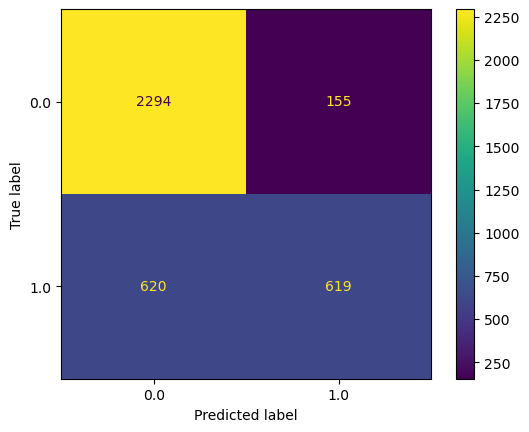

In [273]:
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=model.classes_)
disp.plot()

plt.show()

3.2 Medium Level Income

In [274]:
X=dfn2.drop('FCV, BEV Dummy',axis=1)
y=dfn2['FCV, BEV Dummy']

In [275]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.5,random_state=42)

In [276]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm_model = SVC()
svm_model = svm_model.fit(X_train_scaled, y_train)

In [277]:
y_pred = svm_model.predict(X_test_scaled)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.71      0.96      0.81      4350
         1.0       0.75      0.24      0.37      2292

    accuracy                           0.71      6642
   macro avg       0.73      0.60      0.59      6642
weighted avg       0.72      0.71      0.66      6642



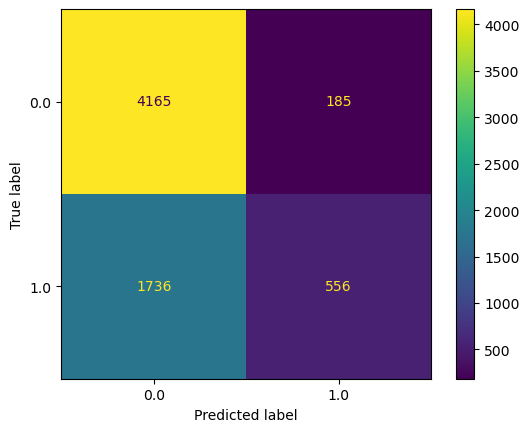

In [278]:
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=model.classes_)
disp.plot()

plt.show()

3.3 High Level Income

In [279]:
X=dfn3.drop('FCV, BEV Dummy',axis=1)
y=dfn3['FCV, BEV Dummy']

In [280]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.5,random_state=42)

In [281]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm_model = SVC()
svm_model = svm_model.fit(X_train_scaled, y_train)

In [282]:
y_pred = svm_model.predict(X_test_scaled)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.73      0.95      0.82      1549
         1.0       0.82      0.39      0.53       908

    accuracy                           0.74      2457
   macro avg       0.77      0.67      0.68      2457
weighted avg       0.76      0.74      0.71      2457



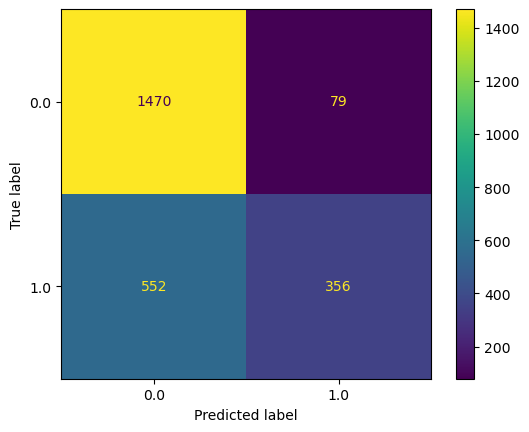

In [283]:
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=model.classes_)
disp.plot()

plt.show()

4. Desicion Tree

4.1 Low Level Income

In [284]:
from sklearn.tree import DecisionTreeClassifier

X = dfn1.drop('FCV, BEV Dummy', axis=1) 
y = dfn1['FCV, BEV Dummy'] 


In [285]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [286]:
y_pred = dt_classifier.predict(X_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.93      0.94      0.94      2449
         1.0       0.88      0.87      0.87      1239

    accuracy                           0.92      3688
   macro avg       0.91      0.90      0.91      3688
weighted avg       0.92      0.92      0.92      3688



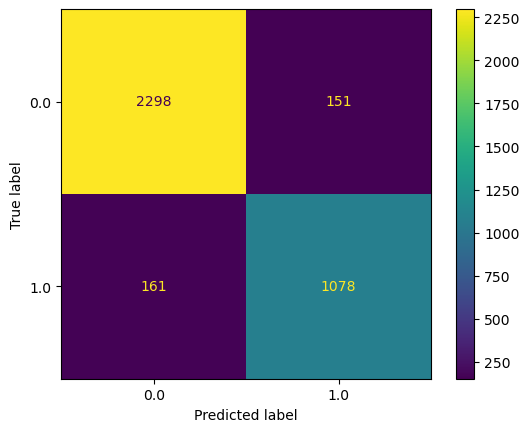

In [287]:
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=model.classes_)
disp.plot()

plt.show()

4.2 Medium Level Income

In [288]:
X = dfn2.drop('FCV, BEV Dummy', axis=1) 
y = dfn2['FCV, BEV Dummy'] 


In [289]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [290]:
y_pred = dt_classifier.predict(X_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.82      0.96      0.88      4350
         1.0       0.88      0.60      0.71      2292

    accuracy                           0.83      6642
   macro avg       0.85      0.78      0.80      6642
weighted avg       0.84      0.83      0.82      6642



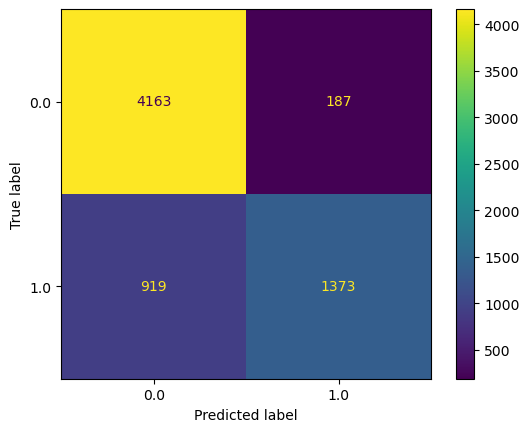

In [291]:
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=model.classes_)
disp.plot()

plt.show()

4.3 High level Income

In [292]:
X = dfn3.drop('FCV, BEV Dummy', axis=1) 
y = dfn3['FCV, BEV Dummy'] 


In [293]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [294]:
y_pred = dt_classifier.predict(X_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.93      0.94      0.93      1549
         1.0       0.89      0.88      0.88       908

    accuracy                           0.92      2457
   macro avg       0.91      0.91      0.91      2457
weighted avg       0.92      0.92      0.92      2457



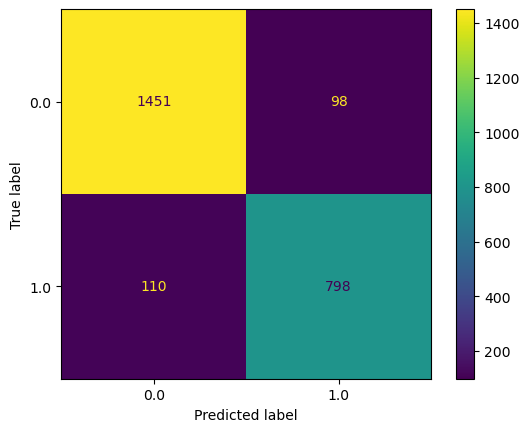

In [295]:
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=model.classes_)
disp.plot()

plt.show()

5.Random Forest

5.1 Low Level Income

In [296]:
from sklearn.ensemble import RandomForestClassifier

X = dfn1.drop('FCV, BEV Dummy', axis=1)
y = dfn1['FCV, BEV Dummy']

In [297]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [298]:
y_pred = rf_classifier.predict(X_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.96      0.96      0.96      2449
         1.0       0.91      0.93      0.92      1239

    accuracy                           0.95      3688
   macro avg       0.94      0.94      0.94      3688
weighted avg       0.95      0.95      0.95      3688



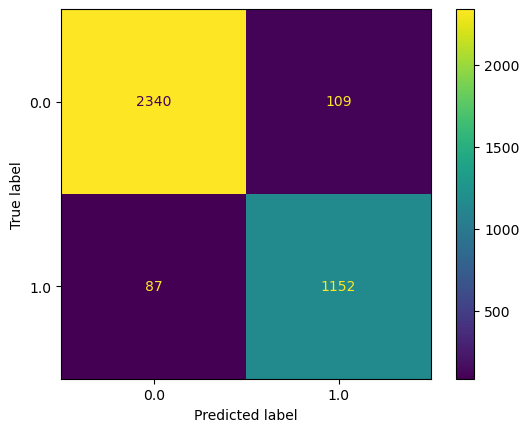

In [299]:
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=model.classes_)
disp.plot()

plt.show()

5.2 Medium Level Income

In [300]:
X = dfn2.drop('FCV, BEV Dummy', axis=1)  
y = dfn2['FCV, BEV Dummy'] 

In [301]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [302]:
y_pred = rf_classifier.predict(X_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.84      0.96      0.90      4350
         1.0       0.91      0.64      0.75      2292

    accuracy                           0.85      6642
   macro avg       0.87      0.80      0.82      6642
weighted avg       0.86      0.85      0.85      6642



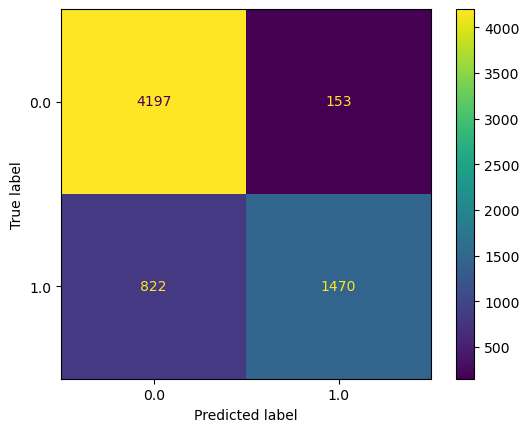

In [303]:
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=model.classes_)
disp.plot()

plt.show()

5.3 High Level Income

In [304]:
X = dfn3.drop('FCV, BEV Dummy', axis=1)  
y = dfn3['FCV, BEV Dummy'] 

In [305]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [306]:
y_pred = rf_classifier.predict(X_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.95      0.94      0.95      1549
         1.0       0.91      0.92      0.91       908

    accuracy                           0.94      2457
   macro avg       0.93      0.93      0.93      2457
weighted avg       0.94      0.94      0.94      2457



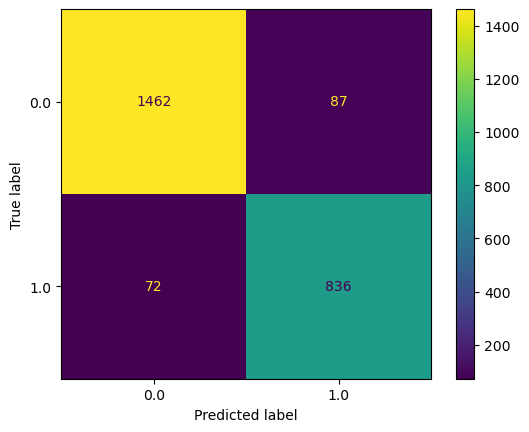

In [307]:
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=model.classes_)
disp.plot()

plt.show()

Cross Validation Method

1. Naive Bayes

1.1 Low Level Income

In [308]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import KFold, cross_val_score
naive_bayes_model = GaussianNB()

num_folds = 10

kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

X = dfn1.drop('FCV, BEV Dummy', axis=1)
y = dfn1['FCV, BEV Dummy']

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    naive_bayes_model.fit(X_train, y_train)
    y_pred = naive_bayes_model.predict(X_test)
    
    scores = cross_val_score(naive_bayes_model, X, y, cv=kf)
    print("Cross-validation scores:", scores)

mean_score = np.mean(scores)
std_score = np.std(scores)

print("Mean cross-validation score:", mean_score)
print("Standard deviation of cross-validation scores:", std_score)


Cross-validation scores: [0.64363144 0.70867209 0.71680217 0.68834688 0.7100271  0.71138211
 0.69742198 0.6797829  0.70149254 0.69606513]
Cross-validation scores: [0.64363144 0.70867209 0.71680217 0.68834688 0.7100271  0.71138211
 0.69742198 0.6797829  0.70149254 0.69606513]
Cross-validation scores: [0.64363144 0.70867209 0.71680217 0.68834688 0.7100271  0.71138211
 0.69742198 0.6797829  0.70149254 0.69606513]
Cross-validation scores: [0.64363144 0.70867209 0.71680217 0.68834688 0.7100271  0.71138211
 0.69742198 0.6797829  0.70149254 0.69606513]
Cross-validation scores: [0.64363144 0.70867209 0.71680217 0.68834688 0.7100271  0.71138211
 0.69742198 0.6797829  0.70149254 0.69606513]
Cross-validation scores: [0.64363144 0.70867209 0.71680217 0.68834688 0.7100271  0.71138211
 0.69742198 0.6797829  0.70149254 0.69606513]
Cross-validation scores: [0.64363144 0.70867209 0.71680217 0.68834688 0.7100271  0.71138211
 0.69742198 0.6797829  0.70149254 0.69606513]
Cross-validation scores: [0.643631

In [309]:
print("Classification Report:")
print(classification_report(y_test, y_pred))
    

Classification Report:
              precision    recall  f1-score   support

         0.0       0.74      0.88      0.80       513
         1.0       0.50      0.28      0.36       224

    accuracy                           0.70       737
   macro avg       0.62      0.58      0.58       737
weighted avg       0.66      0.70      0.67       737



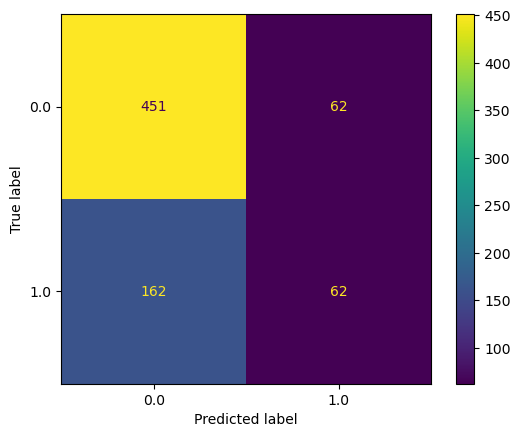

In [310]:
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=model.classes_)
disp.plot()

plt.show()

1.2 Medium Level Income

In [311]:
naive_bayes_model = GaussianNB()

num_folds = 10

kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

X = dfn2.drop('FCV, BEV Dummy', axis=1)
y = dfn2['FCV, BEV Dummy']

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    naive_bayes_model.fit(X_train, y_train)
    y_pred = naive_bayes_model.predict(X_test)
    
    scores = cross_val_score(naive_bayes_model, X, y, cv=kf)
    print("Cross-validation scores:", scores)

mean_score = np.mean(scores)
std_score = np.std(scores)

print("Mean cross-validation score:", mean_score)
print("Standard deviation of cross-validation scores:", std_score)


Cross-validation scores: [0.6440933  0.63431151 0.64785553 0.66215199 0.63855422 0.63629518
 0.61671687 0.66039157 0.65135542 0.67846386]
Cross-validation scores: [0.6440933  0.63431151 0.64785553 0.66215199 0.63855422 0.63629518
 0.61671687 0.66039157 0.65135542 0.67846386]
Cross-validation scores: [0.6440933  0.63431151 0.64785553 0.66215199 0.63855422 0.63629518
 0.61671687 0.66039157 0.65135542 0.67846386]
Cross-validation scores: [0.6440933  0.63431151 0.64785553 0.66215199 0.63855422 0.63629518
 0.61671687 0.66039157 0.65135542 0.67846386]
Cross-validation scores: [0.6440933  0.63431151 0.64785553 0.66215199 0.63855422 0.63629518
 0.61671687 0.66039157 0.65135542 0.67846386]
Cross-validation scores: [0.6440933  0.63431151 0.64785553 0.66215199 0.63855422 0.63629518
 0.61671687 0.66039157 0.65135542 0.67846386]
Cross-validation scores: [0.6440933  0.63431151 0.64785553 0.66215199 0.63855422 0.63629518
 0.61671687 0.66039157 0.65135542 0.67846386]
Cross-validation scores: [0.644093

In [312]:
print("Classification Report:")
print(classification_report(y_test, y_pred))
    

Classification Report:
              precision    recall  f1-score   support

         0.0       0.70      0.92      0.79       884
         1.0       0.55      0.21      0.30       444

    accuracy                           0.68      1328
   macro avg       0.62      0.56      0.55      1328
weighted avg       0.65      0.68      0.63      1328



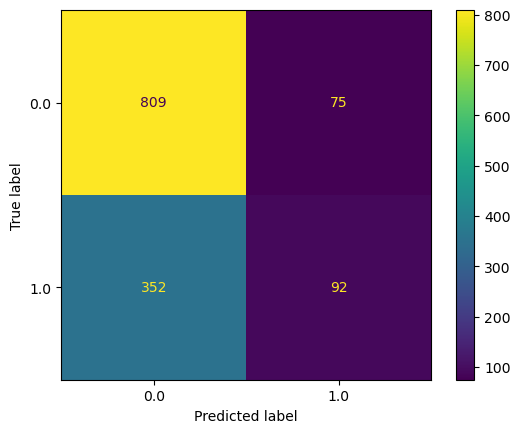

In [313]:
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=model.classes_)
disp.plot()

plt.show()

1.3 High Level Income

In [314]:
naive_bayes_model = GaussianNB()

num_folds = 10

kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

X = dfn3.drop('FCV, BEV Dummy', axis=1)
y = dfn3['FCV, BEV Dummy']

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    naive_bayes_model.fit(X_train, y_train)
    y_pred = naive_bayes_model.predict(X_test)
    
    scores = cross_val_score(naive_bayes_model, X, y, cv=kf)
    print("Cross-validation scores:", scores)

mean_score = np.mean(scores)
std_score = np.std(scores)

print("Mean cross-validation score:", mean_score)
print("Standard deviation of cross-validation scores:", std_score)


Cross-validation scores: [0.65853659 0.65853659 0.66869919 0.68228106 0.66191446 0.66598778
 0.66395112 0.68228106 0.7209776  0.6802444 ]
Cross-validation scores: [0.65853659 0.65853659 0.66869919 0.68228106 0.66191446 0.66598778
 0.66395112 0.68228106 0.7209776  0.6802444 ]
Cross-validation scores: [0.65853659 0.65853659 0.66869919 0.68228106 0.66191446 0.66598778
 0.66395112 0.68228106 0.7209776  0.6802444 ]
Cross-validation scores: [0.65853659 0.65853659 0.66869919 0.68228106 0.66191446 0.66598778
 0.66395112 0.68228106 0.7209776  0.6802444 ]
Cross-validation scores: [0.65853659 0.65853659 0.66869919 0.68228106 0.66191446 0.66598778
 0.66395112 0.68228106 0.7209776  0.6802444 ]
Cross-validation scores: [0.65853659 0.65853659 0.66869919 0.68228106 0.66191446 0.66598778
 0.66395112 0.68228106 0.7209776  0.6802444 ]
Cross-validation scores: [0.65853659 0.65853659 0.66869919 0.68228106 0.66191446 0.66598778
 0.66395112 0.68228106 0.7209776  0.6802444 ]
Cross-validation scores: [0.658536

In [315]:
print("Classification Report:")
print(classification_report(y_test, y_pred))
    

Classification Report:
              precision    recall  f1-score   support

         0.0       0.71      0.90      0.79       330
         1.0       0.53      0.24      0.33       161

    accuracy                           0.68       491
   macro avg       0.62      0.57      0.56       491
weighted avg       0.65      0.68      0.64       491



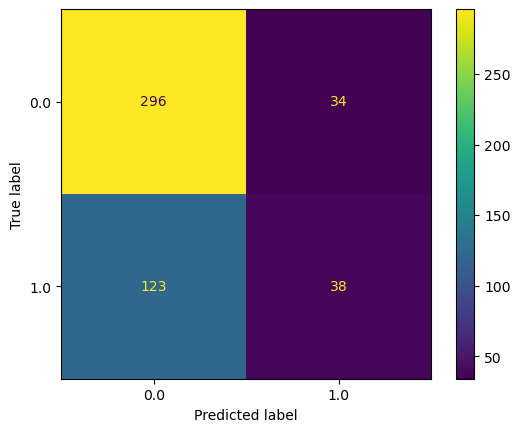

In [316]:
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=model.classes_)
disp.plot()

plt.show()

2. Logistic Regression

2.1 Low Level Income

In [317]:
import numpy as np

logistic_model = LogisticRegression(solver='liblinear', random_state=42)

num_folds = 10

X=dfn1.drop('FCV, BEV Dummy',axis=1)
y=dfn1['FCV, BEV Dummy']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.5,random_state=42)

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    logistic_model.fit(X_train, y_train)
    y_pred = logistic_model.predict(X_test)
    
    

scores = cross_val_score(logistic_model, X_train, y_train, cv=num_folds)

print("Cross-validation scores:", scores)

mean_score = np.mean(scores)
std_score = np.std(scores)

print("Mean cross-validation score:", mean_score)
print("Standard deviation of cross-validation scores:", std_score)


Cross-validation scores: [0.72138554 0.72590361 0.72138554 0.73192771 0.71686747 0.70331325
 0.69728916 0.70933735 0.77259036 0.70739065]
Mean cross-validation score: 0.7207390648567119
Standard deviation of cross-validation scores: 0.02004489184396867


In [318]:
print("Classification Report:")
print(classification_report(y_test, y_pred))
    

Classification Report:
              precision    recall  f1-score   support

         0.0       0.77      0.90      0.83       513
         1.0       0.63      0.37      0.46       224

    accuracy                           0.74       737
   macro avg       0.70      0.64      0.65       737
weighted avg       0.72      0.74      0.72       737



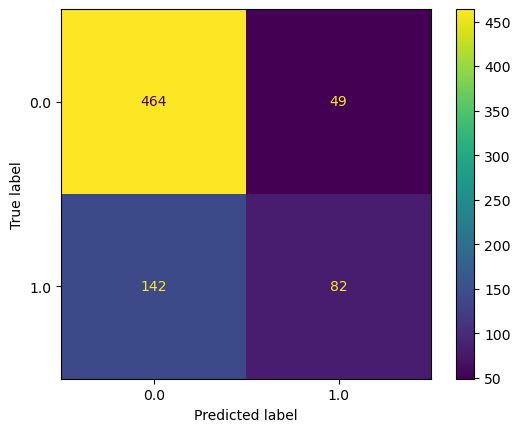

In [319]:
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=model.classes_)
disp.plot()

plt.show()

2.1 Medium Level Income

In [320]:
logistic_model = LogisticRegression(solver='liblinear', random_state=42)

num_folds = 10

X=dfn2.drop('FCV, BEV Dummy',axis=1)
y=dfn2['FCV, BEV Dummy']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.5,random_state=42)

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    logistic_model.fit(X_train, y_train)
    y_pred = logistic_model.predict(X_test)
    
    

scores = cross_val_score(logistic_model, X_train, y_train, cv=num_folds)

print("Cross-validation scores:", scores)

mean_score = np.mean(scores)
std_score = np.std(scores)

print("Mean cross-validation score:", mean_score)
print("Standard deviation of cross-validation scores:", std_score)


Cross-validation scores: [0.6638796  0.67391304 0.65301003 0.67558528 0.66722408 0.63210702
 0.70209205 0.69372385 0.66945607 0.65606695]
Mean cross-validation score: 0.668705797567904
Standard deviation of cross-validation scores: 0.018938336714629075


In [321]:
print("Classification Report:")
print(classification_report(y_test, y_pred))
    

Classification Report:
              precision    recall  f1-score   support

         0.0       0.69      0.97      0.81       884
         1.0       0.71      0.14      0.23       444

    accuracy                           0.69      1328
   macro avg       0.70      0.55      0.52      1328
weighted avg       0.70      0.69      0.61      1328



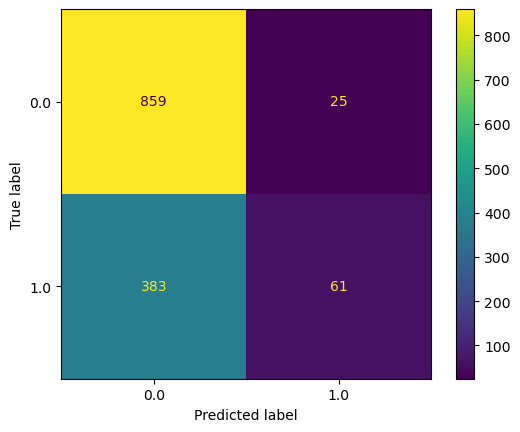

In [322]:
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=model.classes_)
disp.plot()

plt.show()

2.3 High Level Income

In [323]:
logistic_model = LogisticRegression(solver='liblinear', random_state=42)

num_folds = 10

X=dfn3.drop('FCV, BEV Dummy',axis=1)
y=dfn3['FCV, BEV Dummy']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.5,random_state=42)

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    logistic_model.fit(X_train, y_train)
    y_pred = logistic_model.predict(X_test)
    
    

scores = cross_val_score(logistic_model, X_train, y_train, cv=num_folds)

print("Cross-validation scores:", scores)

mean_score = np.mean(scores)
std_score = np.std(scores)

print("Mean cross-validation score:", mean_score)
print("Standard deviation of cross-validation scores:", std_score)


Cross-validation scores: [0.6772009  0.65914221 0.68099548 0.69909502 0.71945701 0.6719457
 0.59502262 0.71040724 0.71493213 0.66742081]
Mean cross-validation score: 0.6795619133223701
Standard deviation of cross-validation scores: 0.03457245368683697


In [324]:
print("Classification Report:")
print(classification_report(y_test, y_pred))
    

Classification Report:
              precision    recall  f1-score   support

         0.0       0.72      0.95      0.82       330
         1.0       0.68      0.24      0.35       161

    accuracy                           0.71       491
   macro avg       0.70      0.59      0.58       491
weighted avg       0.70      0.71      0.66       491



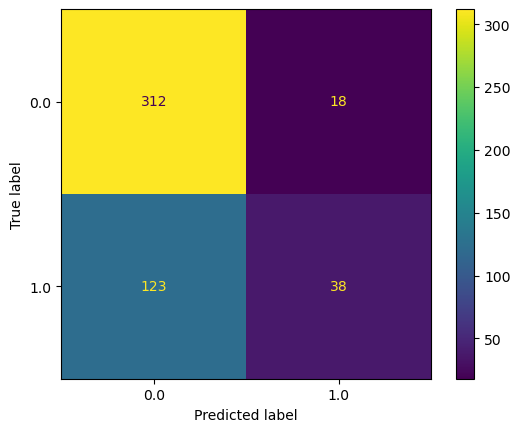

In [325]:
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=model.classes_)
disp.plot()

plt.show()

3. SVM

3.1 Low Level Income

In [326]:
svm_model = SVC()

num_folds = 10

X=dfn1.drop('FCV, BEV Dummy',axis=1)
y=dfn1['FCV, BEV Dummy']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.5,random_state=42)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

for train_index, test_index in kf.split(X):
    X_train_scaled, X_test_scaled = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    svm_model.fit(X_train_scaled, y_train)
    y_pred = svm_model.predict(X_test_scaled)
    

scores = cross_val_score(svm_model, X_train_scaled, y_train, cv=num_folds)

print("Cross-validation scores:", scores)

mean_score = np.mean(scores)
std_score = np.std(scores)

print("Mean cross-validation score:", mean_score)
print("Standard deviation of cross-validation scores:", std_score)


Cross-validation scores: [0.68524096 0.68072289 0.68072289 0.67620482 0.68222892 0.67771084
 0.68524096 0.68072289 0.67771084 0.6907994 ]
Mean cross-validation score: 0.6817305420778135
Standard deviation of cross-validation scores: 0.004159738797669003


In [327]:
print("Classification Report:")
print(classification_report(y_test, y_pred))
    

Classification Report:
              precision    recall  f1-score   support

         0.0       0.70      1.00      0.82       513
         1.0       0.80      0.04      0.07       224

    accuracy                           0.70       737
   macro avg       0.75      0.52      0.45       737
weighted avg       0.73      0.70      0.59       737



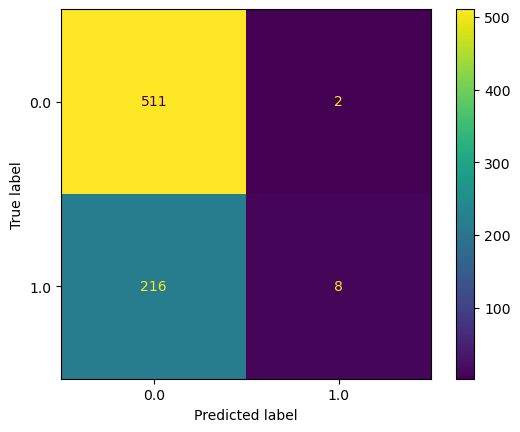

In [328]:
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=model.classes_)
disp.plot()

plt.show()

3.2 Medium Level Income

In [329]:
svm_model = SVC()

num_folds = 10

X=dfn2.drop('FCV, BEV Dummy',axis=1)
y=dfn2['FCV, BEV Dummy']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.5,random_state=42)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

for train_index, test_index in kf.split(X):
    X_train_scaled, X_test_scaled = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    svm_model.fit(X_train_scaled, y_train)
    y_pred = svm_model.predict(X_test_scaled)
    

scores = cross_val_score(svm_model, X_train_scaled, y_train, cv=num_folds)

print("Cross-validation scores:", scores)

mean_score = np.mean(scores)
std_score = np.std(scores)

print("Mean cross-validation score:", mean_score)
print("Standard deviation of cross-validation scores:", std_score)


Cross-validation scores: [0.65551839 0.65551839 0.65551839 0.65551839 0.65551839 0.65551839
 0.65523013 0.65523013 0.65523013 0.65606695]
Mean cross-validation score: 0.6554867690068709
Standard deviation of cross-validation scores: 0.0002324228060624775


In [330]:
print("Classification Report:")
print(classification_report(y_test, y_pred))
    

Classification Report:
              precision    recall  f1-score   support

         0.0       0.67      1.00      0.80       884
         1.0       0.00      0.00      0.00       444

    accuracy                           0.67      1328
   macro avg       0.33      0.50      0.40      1328
weighted avg       0.44      0.67      0.53      1328



C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


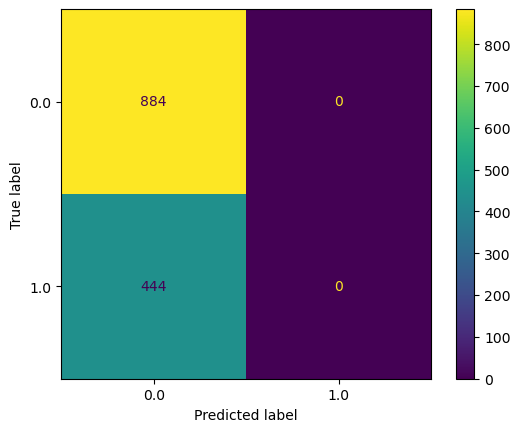

In [331]:
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=model.classes_)
disp.plot()

plt.show()

3.3 High Level Income

In [332]:
svm_model = SVC()

num_folds = 10

X=dfn3.drop('FCV, BEV Dummy',axis=1)
y=dfn3['FCV, BEV Dummy']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.5,random_state=42)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

for train_index, test_index in kf.split(X):
    X_train_scaled, X_test_scaled = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    svm_model.fit(X_train_scaled, y_train)
    y_pred = svm_model.predict(X_test_scaled)
    

scores = cross_val_score(svm_model, X_train_scaled, y_train, cv=num_folds)

print("Cross-validation scores:", scores)

mean_score = np.mean(scores)
std_score = np.std(scores)

print("Mean cross-validation score:", mean_score)
print("Standard deviation of cross-validation scores:", std_score)


Cross-validation scores: [0.66591422 0.66817156 0.61764706 0.63122172 0.64705882 0.6561086
 0.59954751 0.66968326 0.65384615 0.66968326]
Mean cross-validation score: 0.6478882158871537
Standard deviation of cross-validation scores: 0.023063567636778096


In [333]:
print("Classification Report:")
print(classification_report(y_test, y_pred))
    

Classification Report:
              precision    recall  f1-score   support

         0.0       0.69      0.94      0.80       330
         1.0       0.52      0.14      0.22       161

    accuracy                           0.68       491
   macro avg       0.61      0.54      0.51       491
weighted avg       0.64      0.68      0.61       491



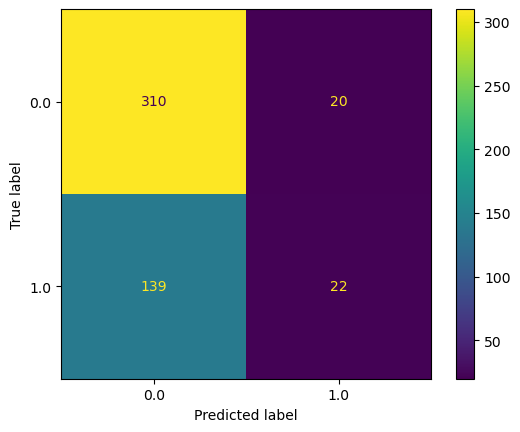

In [334]:
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=model.classes_)
disp.plot()

plt.show()

4.Decision Tree

4.1 Low Level Income

In [335]:
dt_classifier = DecisionTreeClassifier(random_state=42)

num_folds = 10

X = dfn1.drop('FCV, BEV Dummy', axis=1) 
y = dfn1['FCV, BEV Dummy'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    dt_classifier.fit(X_train, y_train)
    y_pred = dt_classifier.predict(X_test)
    

scores = cross_val_score(dt_classifier, X_train, y_train, cv=num_folds)

print("Cross-validation scores:", scores)

mean_score = np.mean(scores)
std_score = np.std(scores)

print("Mean cross-validation score:", mean_score)
print("Standard deviation of cross-validation scores:", std_score)

Cross-validation scores: [0.77710843 0.92921687 0.93072289 0.91415663 0.92771084 0.89307229
 0.93975904 0.91716867 0.94427711 0.91704374]
Mean cross-validation score: 0.909023651165749
Standard deviation of cross-validation scores: 0.04607427213584691


In [336]:
print("Classification Report:")
print(classification_report(y_test, y_pred))
    

Classification Report:
              precision    recall  f1-score   support

         0.0       0.94      0.96      0.95       513
         1.0       0.92      0.87      0.89       224

    accuracy                           0.93       737
   macro avg       0.93      0.92      0.92       737
weighted avg       0.93      0.93      0.93       737



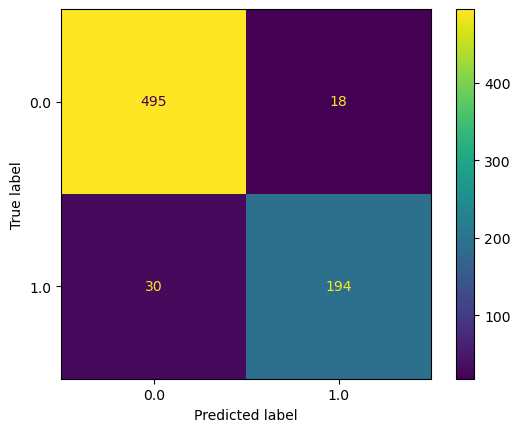

In [337]:
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=model.classes_)
disp.plot()

plt.show()

4.2 Medium Level Income

In [338]:
dt_classifier = DecisionTreeClassifier(random_state=42)

num_folds = 10

X = dfn2.drop('FCV, BEV Dummy', axis=1) 
y = dfn2['FCV, BEV Dummy'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    dt_classifier.fit(X_train, y_train)
    y_pred = dt_classifier.predict(X_test)
    

scores = cross_val_score(dt_classifier, X_train, y_train, cv=num_folds)

print("Cross-validation scores:", scores)

mean_score = np.mean(scores)
std_score = np.std(scores)

print("Mean cross-validation score:", mean_score)
print("Standard deviation of cross-validation scores:", std_score)

Cross-validation scores: [0.75       0.82943144 0.82943144 0.82859532 0.8361204  0.82525084
 0.85271967 0.84937238 0.84267782 0.83933054]
Mean cross-validation score: 0.8282929849848168
Standard deviation of cross-validation scores: 0.027518636033507817


In [339]:
print("Classification Report:")
print(classification_report(y_test, y_pred))
    

Classification Report:
              precision    recall  f1-score   support

         0.0       0.85      0.97      0.90       884
         1.0       0.92      0.65      0.76       444

    accuracy                           0.86      1328
   macro avg       0.88      0.81      0.83      1328
weighted avg       0.87      0.86      0.86      1328



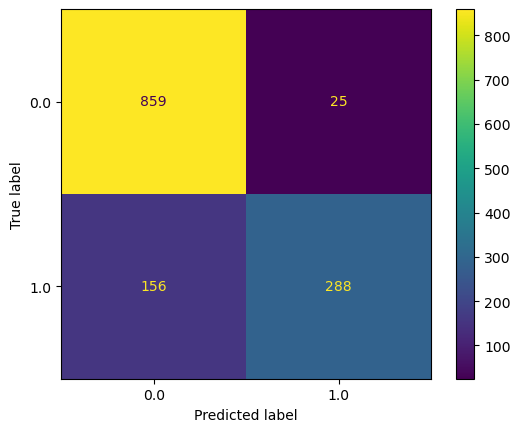

In [340]:
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=model.classes_)
disp.plot()

plt.show()

4.3 High Level Income

In [341]:
dt_classifier = DecisionTreeClassifier(random_state=42)

num_folds = 10

X = dfn3.drop('FCV, BEV Dummy', axis=1) 
y = dfn3['FCV, BEV Dummy'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    dt_classifier.fit(X_train, y_train)
    y_pred = dt_classifier.predict(X_test)
    

scores = cross_val_score(dt_classifier, X_train, y_train, cv=num_folds)

print("Cross-validation scores:", scores)

mean_score = np.mean(scores)
std_score = np.std(scores)

print("Mean cross-validation score:", mean_score)
print("Standard deviation of cross-validation scores:", std_score)

Cross-validation scores: [0.8013544  0.92099323 0.87104072 0.91176471 0.91176471 0.9321267
 0.87556561 0.89819005 0.92760181 0.91402715]
Mean cross-validation score: 0.8964429077760642
Standard deviation of cross-validation scores: 0.03708322758234927


In [342]:
print("Classification Report:")
print(classification_report(y_test, y_pred))
    

Classification Report:
              precision    recall  f1-score   support

         0.0       0.91      0.92      0.91       330
         1.0       0.82      0.81      0.82       161

    accuracy                           0.88       491
   macro avg       0.87      0.86      0.87       491
weighted avg       0.88      0.88      0.88       491



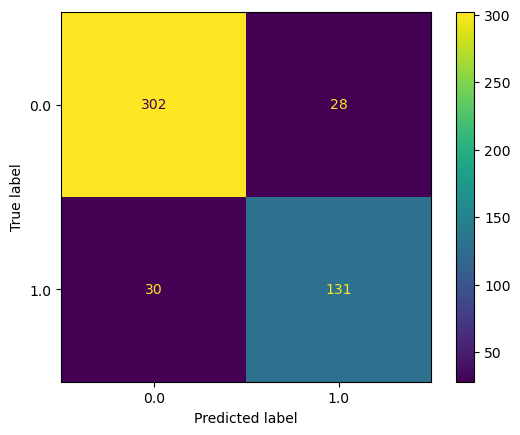

In [343]:
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=model.classes_)
disp.plot()

plt.show()

5.Random Forest

5.1 Low Level Income

In [344]:
drfclassifier = RandomForestClassifier(random_state=42)

num_folds = 10

X = dfn1.drop('FCV, BEV Dummy', axis=1) 
y = dfn1['FCV, BEV Dummy'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    rf_classifier.fit(X_train, y_train)
    y_pred = rf_classifier.predict(X_test)
    

scores = cross_val_score(rf_classifier, X_train, y_train, cv=num_folds)

print("Cross-validation scores:", scores)

mean_score = np.mean(scores)
std_score = np.std(scores)

print("Mean cross-validation score:", mean_score)
print("Standard deviation of cross-validation scores:", std_score)

Cross-validation scores: [0.79066265 0.96536145 0.95331325 0.95481928 0.95783133 0.93222892
 0.94879518 0.94427711 0.96084337 0.95475113]
Mean cross-validation score: 0.9362883661342203
Standard deviation of cross-validation scores: 0.04932542462337216


In [345]:
print("Classification Report:")
print(classification_report(y_test, y_pred))
    

Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97       513
         1.0       0.95      0.92      0.93       224

    accuracy                           0.96       737
   macro avg       0.96      0.95      0.95       737
weighted avg       0.96      0.96      0.96       737



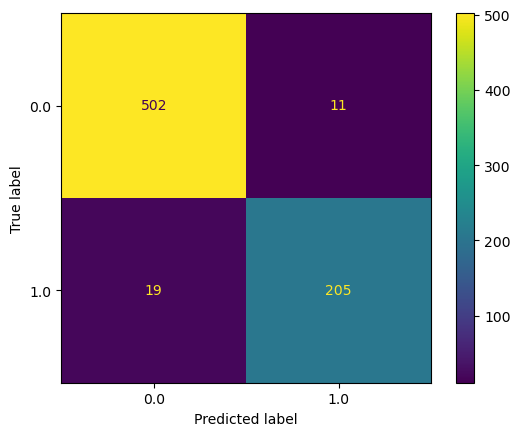

In [346]:
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=model.classes_)
disp.plot()

plt.show()

5.2 Medium Level Income

In [347]:
drfclassifier = RandomForestClassifier(random_state=42)

num_folds = 10

X = dfn2.drop('FCV, BEV Dummy', axis=1) 
y = dfn2['FCV, BEV Dummy'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    rf_classifier.fit(X_train, y_train)
    y_pred = rf_classifier.predict(X_test)
    

scores = cross_val_score(rf_classifier, X_train, y_train, cv=num_folds)

print("Cross-validation scores:", scores)

mean_score = np.mean(scores)
std_score = np.std(scores)

print("Mean cross-validation score:", mean_score)
print("Standard deviation of cross-validation scores:", std_score)

Cross-validation scores: [0.76505017 0.85367893 0.85451505 0.86287625 0.85451505 0.85618729
 0.87112971 0.87112971 0.85020921 0.86359833]
Mean cross-validation score: 0.8502889688081611
Standard deviation of cross-validation scores: 0.02924365353772006


In [348]:
print("Classification Report:")
print(classification_report(y_test, y_pred))
    

Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      0.98      0.91       884
         1.0       0.94      0.67      0.78       444

    accuracy                           0.88      1328
   macro avg       0.90      0.82      0.85      1328
weighted avg       0.88      0.88      0.87      1328



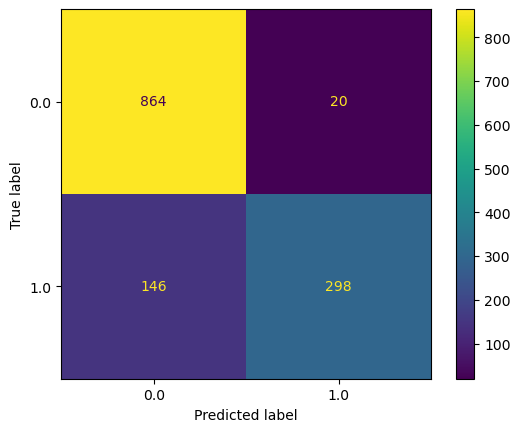

In [349]:
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=model.classes_)
disp.plot()

plt.show()

5.3 High Level Income

In [350]:
drfclassifier = RandomForestClassifier(random_state=42)

num_folds = 10

X = dfn3.drop('FCV, BEV Dummy', axis=1) 
y = dfn3['FCV, BEV Dummy'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    rf_classifier.fit(X_train, y_train)
    y_pred = rf_classifier.predict(X_test)
    

scores = cross_val_score(rf_classifier, X_train, y_train, cv=num_folds)

print("Cross-validation scores:", scores)

mean_score = np.mean(scores)
std_score = np.std(scores)

print("Mean cross-validation score:", mean_score)
print("Standard deviation of cross-validation scores:", std_score)

Cross-validation scores: [0.8261851  0.94356659 0.9638009  0.92307692 0.93665158 0.94117647
 0.91402715 0.9479638  0.95248869 0.95248869]
Mean cross-validation score: 0.9301425901147053
Standard deviation of cross-validation scores: 0.037296490059408924


In [351]:
print("Classification Report:")
print(classification_report(y_test, y_pred))
    

Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      0.94      0.94       330
         1.0       0.87      0.91      0.89       161

    accuracy                           0.93       491
   macro avg       0.91      0.92      0.92       491
weighted avg       0.93      0.93      0.93       491



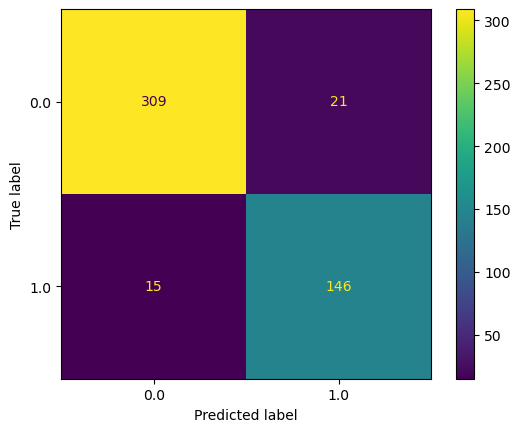

In [352]:
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=model.classes_)
disp.plot()

plt.show()

LIME Analysis

Low level income

In [353]:
! pip install lime
import lime
import lime.lime_tabular
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# Separate features (X) and target variable (y)
X = dfn1.drop('FCV, BEV Dummy', axis=1)  # Assuming 'target_column' is the name of your target column
y = dfn1['FCV, BEV Dummy']

In [354]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X, y)

RandomForestClassifier(random_state=42)

In [355]:
explainer = lime.lime_tabular.LimeTabularExplainer(X.values,
                                                   feature_names=X.columns,
                                                   class_names=dfn1['FCV, BEV Dummy'].unique(),
                                                   discretize_continuous=True)

In [356]:
instance_idx = 0
instance = X.iloc[[instance_idx]]

In [357]:

explanation = explainer.explain_instance(instance.values[0], rf_classifier.predict_proba)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [358]:
print("Explanation for instance {}: ".format(instance_idx))
print(explanation.as_list())

Explanation for instance 0: 
[('# vehicles > 2.00', 0.0944982802017929), ('1.97 < CO2 emission <= 2.63', -0.04229480655702864), ('0.93 < Home Type <= 1.00', 0.03724420078121484), ('Household size > 3.23', 0.022210610057509406), ('52.09 < Age <= 65.00', -0.02085115180875337), ('Previous BEVs <= 0.00', 0.010221143892022175), ('12.41 < Commute distance <= 19.80', -0.009439198096901314)]


In [359]:

explanation.show_in_notebook(show_table=True)

Medium level income

In [360]:

X = dfn2.drop('FCV, BEV Dummy', axis=1)  # Assuming 'target_column' is the name of your target column
y = dfn2['FCV, BEV Dummy']

In [361]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X, y)

RandomForestClassifier(random_state=42)

In [362]:
explainer = lime.lime_tabular.LimeTabularExplainer(X.values,
                                                   feature_names=X.columns,
                                                   class_names=dfn2['FCV, BEV Dummy'].unique(),
                                                   discretize_continuous=True)

In [363]:
instance_idx = 0
instance = X.iloc[[instance_idx]]

In [364]:
explanation = explainer.explain_instance(instance.values[0], rf_classifier.predict_proba)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [365]:
print("Explanation for instance {}: ".format(instance_idx))
print(explanation.as_list())

Explanation for instance 0: 
[('2.92 < Household size <= 3.02', 0.07839533903991101), ('Previous BEVs <= 0.00', 0.04694964676381432), ('1.00 < # vehicles <= 2.00', -0.040381208355132765), ('0.83 < Home Type <= 1.00', 0.0313928522177035), ('1.80 < CO2 emission <= 2.44', -0.03132156284387414), ('Commute distance > 19.04', -0.00600289318849069), ('Age <= 45.00', -0.001170717649111338)]


In [366]:
explanation.show_in_notebook(show_table=True)

High level income

In [367]:
X = dfn3.drop('FCV, BEV Dummy', axis=1) 
y = dfn3['FCV, BEV Dummy']

In [368]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X, y)

RandomForestClassifier(random_state=42)

In [369]:
explainer = lime.lime_tabular.LimeTabularExplainer(X.values,
                                                   feature_names=X.columns,
                                                   class_names=dfn1['FCV, BEV Dummy'].unique(),
                                                   discretize_continuous=True)

In [370]:
instance_idx = 0
instance = X.iloc[[instance_idx]]

In [371]:
explanation = explainer.explain_instance(instance.values[0], rf_classifier.predict_proba)
print("Explanation for instance {}: ".format(instance_idx))
print(explanation.as_list())

Explanation for instance 0: 
[('2.00 < Household size <= 3.00', -0.0396223160639937), ('# vehicles <= 2.00', -0.035805528787721724), ('Age <= 45.00', -0.032904299468919894), ('Previous BEVs <= 0.00', 0.02873179219646876), ('CO2 emission > 2.73', -0.02710737623575146), ('Commute distance > 22.74', -0.008057318433042034), ('Home Type <= 1.00', 0.0)]


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [372]:
explanation1 = explainer.explain_instance(instance.values[0], rf_classifier.predict_proba, labels=[1])

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [373]:
print("Explanation for instance {}: ".format(instance_idx))
print(explanation1.as_list())

Explanation for instance 0: 
[('2.00 < Household size <= 3.00', -0.03993000643441611), ('# vehicles <= 2.00', -0.039801330917413336), ('Age <= 45.00', -0.035670536968754246), ('CO2 emission > 2.73', -0.03305037137962043), ('Commute distance > 22.74', -0.02522065662936235), ('Previous BEVs <= 0.00', 0.018106227971859103), ('Home Type <= 1.00', 0.0)]


In [374]:
explanation.show_in_notebook(show_table=True)

In [375]:
explanation1.show_in_notebook(show_table=True)

In [376]:
X = dfn1.drop('FCV, BEV Dummy', axis=1) 
y = dfn1['FCV, BEV Dummy']

# Print index number
print("Index number:", instance_idx)

# Print corresponding feature names and values
print("Feature values:")
for feature, value in zip(X.columns, instance.values[0]):
    print(f"{feature}: {value}")


Index number: 0
Feature values:
Previous BEVs: 0.0
CO2 emission: 2.93
Home Type: 1.0
Commute distance: 25.98
Household size: 3.0
Age: 45.0
# vehicles: 2.0


In [377]:
X = dfn2.drop('FCV, BEV Dummy', axis=1) 
y = dfn2['FCV, BEV Dummy']

# Print index number
print("Index number:", instance_idx)

# Print corresponding feature names and values
print("Feature values:")
for feature, value in zip(X.columns, instance.values[0]):
    print(f"{feature}: {value}")


Index number: 0
Feature values:
Previous BEVs: 0.0
CO2 emission: 2.93
Home Type: 1.0
Commute distance: 25.98
Household size: 3.0
Age: 45.0
# vehicles: 2.0


In [378]:
X = dfn3.drop('FCV, BEV Dummy', axis=1) 
y = dfn3['FCV, BEV Dummy']

# Print index number
print("Index number:", instance_idx)

# Print corresponding feature names and values
print("Feature values:")
for feature, value in zip(X.columns, instance.values[0]):
    print(f"{feature}: {value}")


Index number: 0
Feature values:
Previous BEVs: 0.0
CO2 emission: 2.93
Home Type: 1.0
Commute distance: 25.98
Household size: 3.0
Age: 45.0
# vehicles: 2.0
